<a href="https://colab.research.google.com/github/priyanshgupta1998/Tensorflow_deep_learning/blob/master/Predict%20survival%20on%20the%20Titanic%20using%20Deep%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster on kaggle

# Predict survival on the Titanic  using Deep learning

`For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class.`



##Data description:

survival::	Survival	--> 0 = No, 1 = Yes  

pclass: :	Ticket class	---> 1 = 1st, 2 = 2nd, 3 = 3rd

embarked:: Port of Embarkation	--->        
C = Cherbourg,        
Q = Queenstown,     
S = Southampton     




`pclass: A proxy for socio-economic status (SES)    `
`1st = Upper `     
`2nd = Middle`     
`3rd = Lower   `        

`sibsp: The dataset defines family relations in this way...  `    
`Sibling = brother, sister, stepbrother, stepsister   `   
`Spouse = husband, wife (mistresses and fiancés were ignored)`    

`parch: The dataset defines family relations in this way...`    
`Parent = mother, father      ` 
`Child = daughter, son, stepdaughter, stepson `   
`Some children travelled only with a nanny, therefore parch=0 for them.`     



---



---



---



---

#Data load

In [0]:
cd /home

/home


In [0]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [0]:
!kaggle datasets list -s c/titanic/data

ref                                                 title                                   size  lastUpdated          downloadCount  
--------------------------------------------------  -------------------------------------  -----  -------------------  -------------  
azeembootwala/titanic                               Titanic                                 12KB  2017-06-05 12:14:37           1694  
pavlofesenko/titanic-extended                       Titanic extended (Kaggle + Wikipedia)  132KB  2019-03-06 09:53:24            256  
harunshimanto/titanic-solution-for-beginners-guide  Titanic Solution for Beginner's Guide   34KB  2018-03-12 17:47:06            352  
numbersareuseful/titanic-public-leaderboard         Public Leaderboard: Titanic            352KB  2018-05-10 21:53:10             26  
igorafm/braziliansc-habeascorpusjan1518             BrazilianSC_HabeasCorpusJan1518        182KB  2018-02-08 14:44:10             32  
tpompo/titanic                                      Tit

In [0]:
!kaggle datasets download -d harunshimanto/titanic-solution-for-beginners-guide

  0% 0.00/33.9k [00:00<?, ?B/s]
100% 33.9k/33.9k [00:00<00:00, 25.0MB/s]


In [0]:
!unzip titanic-solution-for-beginners-guide.zip

Archive:  titanic-solution-for-beginners-guide.zip
  inflating: train.csv               
  inflating: genderclassfare.csv     
  inflating: test.csv                




---



---



---



---
#Preprocessing


In [0]:
import numpy as np
import pandas as pd

from keras import models
from keras import layers
from keras import optimizers
from keras import losses 
from keras import metrics

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
training_set = pd.read_csv('train.csv')
testing_set = pd.read_csv('test.csv')

In [0]:
print(training_set.shape)
training_set.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
print(testing_set.shape)
testing_set.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
x_train = training_set.drop(['PassengerId','Name','Ticket','Survived'], axis=1)
y_train = training_set['Survived']

x_test = testing_set.drop(['PassengerId','Name','Ticket'], axis=1)

In [0]:
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].mean())

#Step 2 Cleanup and Transform the Data
Transform all categorial values into numeric value for both Training and Testing data set

In [0]:
k = list(x_train['Age'].value_counts().index)
age = [ int(k[i]) for i in range(len(k))]
print('Total Ages ' , len(set(age)) , set(age))

Total Ages  71 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70, 71, 74, 80}


In [0]:
x_train[x_train['Age']<=0]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [0]:

bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
# values like 0,1,2,3,4,5,6,7

categories = pd.cut(x_train['Age'], bins, labels=group_names)
print(set(categories.cat.codes.values))
categories.cat.codes.index


{1, 2, 3, 4, 5, 6, 7}


RangeIndex(start=0, stop=891, step=1)

In [0]:
k = list(x_train['Cabin'].value_counts().index)
k[:10]

['C23 C25 C27',
 'G6',
 'B96 B98',
 'F33',
 'D',
 'C22 C26',
 'F2',
 'E101',
 'D20',
 'D36']

In [0]:
x_train['Cabin'].isna().sum()

687

In [0]:
df = x_train.copy()
df['Cabin'] = df['Cabin'].fillna('N')
print(df['Cabin'].isna().sum())

df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
print(set(df['Cabin'].values))    #Take only first character from the cabin name

0
{'B', 'C', 'G', 'F', 'T', 'E', 'D', 'A', 'N'}


In [0]:
df['Cabin'] = pd.Categorical(df['Cabin'])
pd.Categorical(df['Cabin'])

[N, C, N, C, N, ..., N, B, N, C, N]
Length: 891
Categories (9, object): [A, B, C, D, ..., F, G, N, T]

In [0]:
df['Cabin'] = df['Cabin'].cat.codes 

In [0]:
x_train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [0]:
df['Cabin'].head()

0    7
1    2
2    7
3    2
4    7
Name: Cabin, dtype: int8

In [0]:
print('Total expected Fares : ' , len(set(df['Fare'].value_counts().index))  , '   -->   ' , set(df['Fare'].value_counts().index))
df['Fare'] = df.Fare.fillna(-0.5)
bins = (-1, 0, 8, 15, 31, 1000)    # values are 0,1,2,3,4
group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
categories = pd.cut(df['Fare'], bins, labels=group_names)
print(set(categories.cat.codes.values) )   # In which block(of bins) value falls

Total expected Fares :  248    -->    {0.0, 512.3292, 4.0125, 5.0, 6.75, 7.25, 7.225, 7.75, 8.05, 7.8958, 10.5, 7.925, 7.775, 13.0, 7.2292, 8.6625, 16.1, 15.5, 14.5, 14.4542, 21.0, 15.2458, 24.15, 21.075, 26.2875, 26.55, 26.0, 27.9, 26.25, 30.0, 31.275, 27.7208, 30.5, 29.125, 34.375, 7.7958, 35.5, 7.7333, 39.6875, 39.0, 7.125, 41.5792, 7.8292, 36.75, 9.5, 46.9, 9.0, 49.5042, 8.5167, 51.8625, 52.0, 53.1, 52.5542, 55.9, 56.4958, 11.5, 56.9292, 57.0, 55.0, 57.9792, 12.0, 63.3583, 12.875, 65.0, 13.5, 66.6, 59.4, 69.55, 69.3, 71.0, 71.2833, 73.5, 14.0, 75.25, 76.7292, 77.9583, 78.2667, 79.2, 79.65, 80.0, 77.2875, 83.1583, 83.475, 78.85, 86.5, 82.1708, 16.0, 89.1042, 90.0, 18.75, 18.0, 18.7875, 93.5, 91.0792, 19.2583, 19.5, 7.8542, 20.525, 20.25, 20.2125, 7.7292, 106.425, 21.6792, 108.9, 13.8583, 110.8833, 22.3583, 22.025, 113.275, 22.525, 23.0, 23.25, 120.0, 24.0, 25.9292, 25.5875, 14.1083, 133.65, 134.5, 135.6333, 27.75, 27.0, 8.6833, 28.5, 28.7125, 29.0, 146.5208, 151.55, 30.6958, 153.462

In [0]:
print('Total genders : ' , len(set(df['Sex'].value_counts().index))  , '   -->   ' , set(df['Sex'].value_counts().index))

Total genders :  2    -->    {'female', 'male'}


In [0]:
df['Sex'] = pd.Categorical(df['Sex'])
print(set(df['Sex'].cat.codes.values))

{0, 1}


In [0]:
print('Total Embarked : ' , len(set(df['Embarked'].value_counts().index))  , '   -->   ' , set(df['Embarked'].value_counts().index))

Total Embarked :  3    -->    {'S', 'C', 'Q'}


In [0]:
df['Embarked'] = pd.Categorical(df['Embarked'])
print(pd.Categorical(df['Embarked']))
print(set((df['Embarked'].cat.codes + 1).values))

[S, C, S, S, S, ..., S, S, S, C, Q]
Length: 891
Categories (3, object): [C, Q, S]
{0, 1, 2, 3}


###Final (all together)

In [0]:
def simplify_ages(df):
    #df['Age'] = df['Age'].fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df['Age'], bins, labels=group_names)
    df['Age'] = categories.cat.codes 
    return df

def simplify_cabins(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
    df['Cabin'] =  pd.Categorical(df['Cabin'])
    df['Cabin'] = df['Cabin'].cat.codes 
    return df

def simplify_fares(df):
    df['Fare'] = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df['Fare'], bins, labels=group_names)
    df['Fare'] = categories.cat.codes 
    return df

def simplify_sex(df):
    df['Sex'] = pd.Categorical(df['Sex'])
    df['Sex'] = df['Sex'].cat.codes 
    return df

def simplify_embarked(df):
    df['Embarked'] = pd.Categorical(df['Embarked'])
    df['Embarked'] = df['Embarked'].cat.codes + 1
    return df

def transform_feature(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = simplify_sex(df)
    df = simplify_embarked(df)
    return df

In [0]:
transform_feature(x_train).head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,4,1,0,1,7,3
1,1,0,6,1,0,4,2,1
2,3,0,5,0,0,1,7,3
3,1,0,5,1,0,4,2,3
4,3,1,5,0,0,2,7,3


In [0]:
transform_feature(x_test).head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,5,0,0,1,7,2
1,3,0,6,1,0,1,7,3
2,2,1,7,0,0,2,7,2
3,3,1,5,0,0,2,7,3
4,3,0,4,1,1,2,7,3


#Step 3 Build the NN model using Keras
Total 3 types of Layers,       
first 2 layers  with 32 hidden value with "Relu" activation function      
Last layer with Sigmoid activation function

In [0]:
#Create a keras model (to build the NN)
model = models.Sequential()  

model.add(layers.Dense(32, activation='relu',input_shape=(8,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))


#model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

Instructions for updating:
Colocations handled automatically by placer.


##Step 3.1 
 Split the training data set with validation set, and run the model    
Default validation set size is 50

In [0]:
y_train = np.asarray(y_train)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

validation_size = 200

x_val = x_train[ : validation_size]            #X_validation set
partial_x_train = x_train[validation_size:]  # remaining data as traning

y_val = y_train[:validation_size]             #Y_validation set
partial_y_train = y_train[validation_size:]   # remaining data as traning

In [0]:
#fit or train the model
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=30, 
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 691 samples, validate on 200 samples
Epoch 1/30
691/691 [==============================] - 3s 4ms/step - loss: 0.6490 - binary_accuracy: 0.6237 - val_loss: 0.6303 - val_binary_accuracy: 0.6450
Epoch 2/30
691/691 [==============================] - 0s 122us/step - loss: 0.5822 - binary_accuracy: 0.7077 - val_loss: 0.6227 - val_binary_accuracy: 0.6550
Epoch 3/30
691/691 [==============================] - 0s 130us/step - loss: 0.5529 - binary_accuracy: 0.7207 - val_loss: 0.6232 - val_binary_accuracy: 0.6400
Epoch 4/30
691/691 [==============================] - 0s 125us/step - loss: 0.5323 - binary_accuracy: 0.7323 - val_loss: 0.6065 - val_binary_accuracy: 0.6400
Epoch 5/30
691/691 [==============================] - 0s 141us/step - loss: 0.5182 - binary_accuracy: 0.7337 - val_loss: 0.6083 - val_binary_accuracy: 0.6450
Epoch 6/30
691/691 [==============================] - 0s 124us/step - loss: 0.5030 - binary_accuracy: 0.7540 - val_los

##Step 3.2    
Plot accuracy and loss for both training and validation set, to check the model optimization level

In [0]:
#Training set accuracy
print(len(history.history['binary_accuracy']))   #30 Epochs 
history.history['binary_accuracy'][:5]

30


[0.6237337191180796,
 0.7076700427252718,
 0.7206946457864234,
 0.7322720699820954,
 0.7337192467773702]

In [0]:
##Training set loss
print(len(history.history['loss']))    #30 Epochs
history.history['loss'][:5]

30


[0.6490299786224034,
 0.5821805470414169,
 0.5528884890628103,
 0.532302682634373,
 0.518181156146026]

In [0]:
#Validation set accuracy
print(len(history.history['val_binary_accuracy']))  #30 Epochs
history.history['val_binary_accuracy'][:5]

30


[0.645, 0.655, 0.64, 0.64, 0.645]

In [0]:
#Validation set loss
print(len(history.history['val_loss']))    #30 Epochs
history.history['val_loss'][:5]

30


[0.6302623701095581,
 0.6227462673187256,
 0.6231590270996094,
 0.6065428733825684,
 0.6082676219940185]

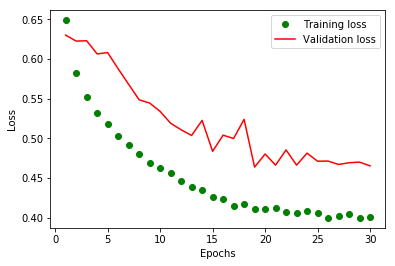

In [0]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)   #30 Epochs

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

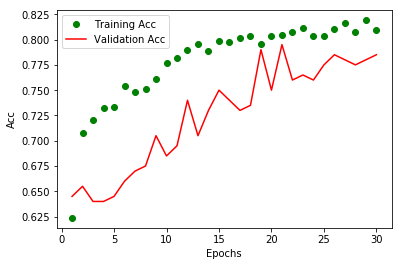

In [0]:
plt.clf()   #Make classifier

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'go', label='Training Acc')
plt.plot(epochs, val_acc,'r', label='Validation Acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

##Step 4    Optimization       
Repeat Step 3 multiple times till we find best model for this dataset.      
Example:   
1. Will adding more hidden units or additional hidden layer help?     
2. what if I change my activation function?        
3. increase/decrease my learning rate?       
4. Will increase number of Epochs help?       

#Step 5 Predict the actual Test Data

In [0]:
ids = testing_set['PassengerId'].copy()
ids.to_frame().head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [0]:
predictions = model.predict_classes(x_test)

ids = testing_set['PassengerId'].copy()
new_output = ids.to_frame()

new_output["Survived"]=predictions
new_output.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [0]:
new_output.to_csv("my_submission.csv",index=False)